In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = pd.read_csv("Automobile.csv")
X = data.iloc[:, 1:-2]
columns = X.columns
comparison_labels = [ "Good", "Average", "Bad"]
colors = ["green", "blue", "red"]

X = X.fillna(X["horsepower"].mean())
X["weight"] = 1 / X["weight"]

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++")
result = kmeans.fit_predict(X)

for i in range(len(list(result))):
  print(f" {data.iloc[i, 5]} : {comparison_labels[result[i]]}")

 3504 : Average
 3693 : Average
 3436 : Average
 3433 : Average
 3449 : Average
 4341 : Average
 4354 : Average
 4312 : Average
 4425 : Average
 3850 : Average
 3563 : Average
 3609 : Average
 3761 : Average
 3086 : Average
 2372 : Good
 2833 : Bad
 2774 : Bad
 2587 : Bad
 2130 : Good
 1835 : Good
 2672 : Good
 2430 : Good
 2375 : Good
 2234 : Good
 2648 : Bad
 4615 : Average
 4376 : Average
 4382 : Average
 4732 : Average
 2130 : Good
 2264 : Good
 2228 : Good
 2046 : Good
 2634 : Bad
 3439 : Bad
 3329 : Bad
 3302 : Bad
 3288 : Bad
 4209 : Average
 4464 : Average
 4154 : Average
 4096 : Average
 4955 : Average
 4746 : Average
 5140 : Average
 2962 : Bad
 2408 : Good
 3282 : Bad
 3139 : Bad
 2220 : Good
 2123 : Good
 2074 : Good
 2065 : Good
 1773 : Good
 1613 : Good
 1834 : Good
 1955 : Good
 2278 : Good
 2126 : Good
 2254 : Good
 2408 : Good
 2226 : Good
 4274 : Average
 4385 : Average
 4135 : Average
 4129 : Average
 3672 : Average
 4633 : Average
 4502 : Average
 4456 : Average
 44

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_count = {}
for i in range(len(comparison_labels)):
  print(f"{comparison_labels[i]} Cars : {list(result).count(i)}")
  kmeans_count[comparison_labels[i] + " Cars"] = list(result).count(i)
print(kmeans_count)

Good Cars : 216
Average Cars : 98
Bad Cars : 84
{'Good Cars': 216, 'Average Cars': 98, 'Bad Cars': 84}


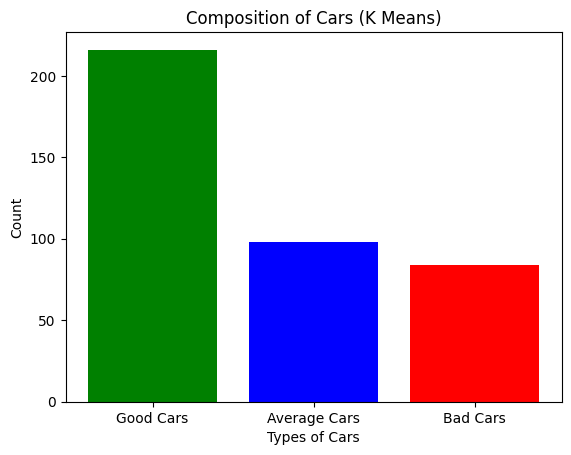

In [ ]:
plt.bar(list(kmeans_count.keys()), list(kmeans_count.values()), color=colors)
plt.title("Composition of Cars (K Means)")
plt.xlabel("Types of Cars")
plt.ylabel("Count")
plt.show()

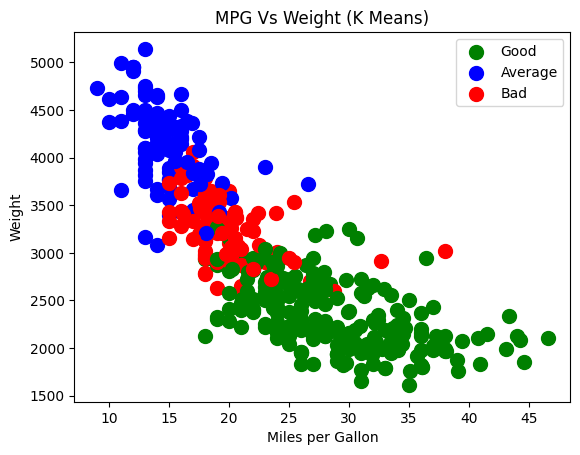

In [ ]:
for i in range(len(X)):
    plt.scatter(X.iloc[i, 0], data.iloc[i, 5], s = 100, c = colors[result[i]])
leg = plt.legend(labels=comparison_labels)
for i, j in enumerate(leg.legend_handles):
    j.set_color(colors[i])

plt.title('MPG Vs Weight (K Means)')
plt.xlabel('Miles per Gallon')
plt.ylabel('Weight')
plt.show()

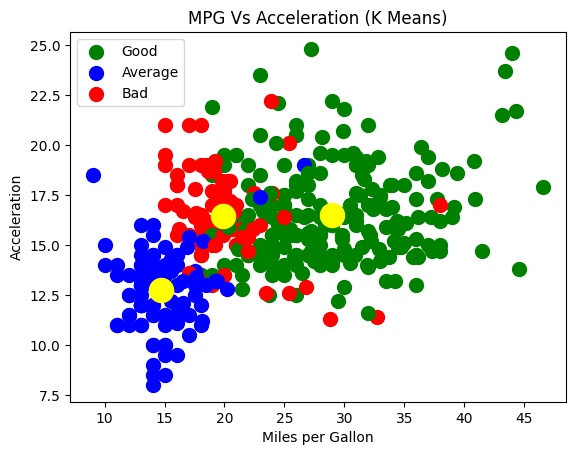

In [ ]:
for i in range(len(X)):
    plt.scatter(X.iloc[i, 0], X.iloc[i, 5], s = 100, c = colors[result[i]])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s = 300, c = 'yellow', label = 'Centroids')
leg = plt.legend(labels=comparison_labels)
for i, j in enumerate(leg.legend_handles):
    j.set_color(colors[i])

plt.title('MPG Vs Acceleration (K Means)')
plt.xlabel('Miles per Gallon')
plt.ylabel('Acceleration')
plt.show()

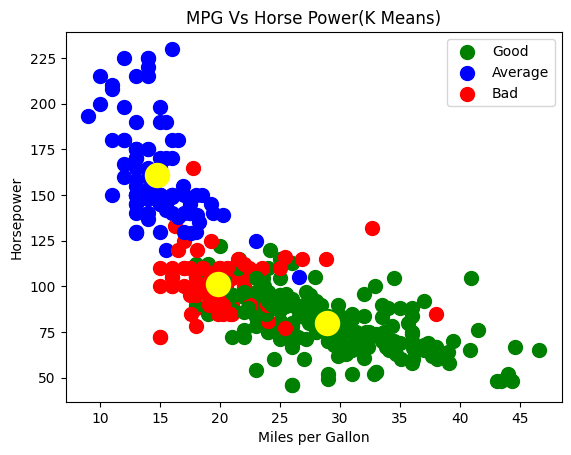

In [ ]:
for i in range(len(X)):
    plt.scatter(X.iloc[i, 0], X.iloc[i, 3], s = 100, c = colors[result[i]])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('MPG Vs Horse Power(K Means)')
plt.xlabel('Miles per Gallon')
plt.ylabel('Horsepower')
leg = plt.legend(labels=comparison_labels)
for i, j in enumerate(leg.legend_handles):
    j.set_color(colors[i])
plt.show()

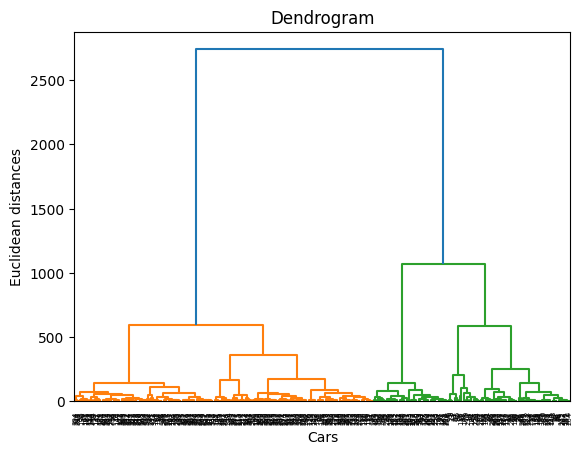

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cars')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
aglo_count = {}

for i in range(len(comparison_labels)):
  print(f"{comparison_labels[i]} Cars : {list(y_hc).count(i)}")
  aglo_count[comparison_labels[i] + " Cars"] = list(y_hc).count(i)

print(aglo_count)

Good Cars : 240
Average Cars : 98
Bad Cars : 60
{'Good Cars': 240, 'Average Cars': 98, 'Bad Cars': 60}


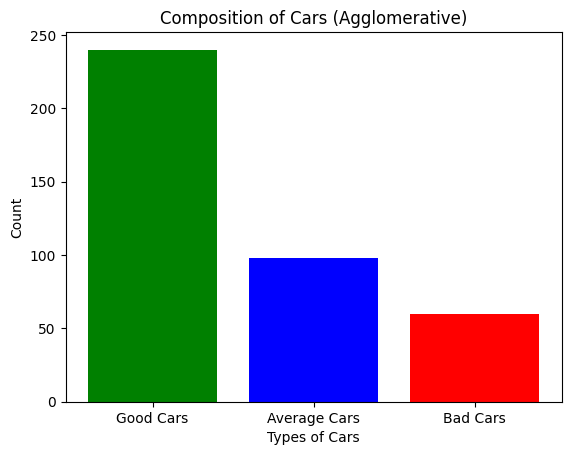

In [ ]:
plt.bar(list(aglo_count.keys()), list(aglo_count.values()), color=colors)
plt.title("Composition of Cars (Agglomerative)")
plt.xlabel("Types of Cars")
plt.ylabel("Count")
plt.show()

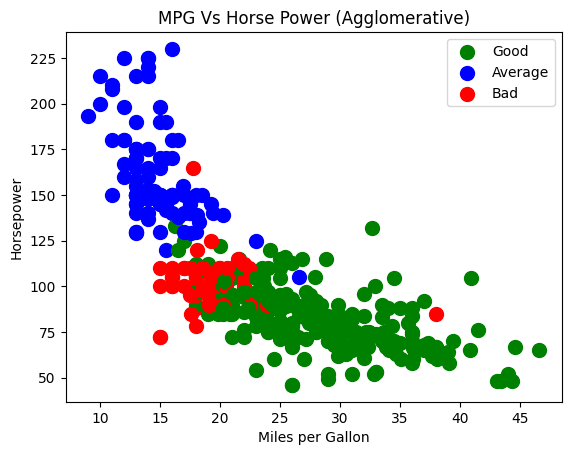

In [ ]:
for i in range(len(X)):
    plt.scatter(X.iloc[i, 0], X.iloc[i, 3], s = 100, c = colors[y_hc[i]])
plt.title('MPG Vs Horse Power (Agglomerative)')
plt.xlabel('Miles per Gallon')
plt.ylabel('Horsepower')
leg = plt.legend(labels=comparison_labels)
for i, j in enumerate(leg.legend_handles):
    j.set_color(colors[i])
plt.show()